### END 2 END NLP Project
+ Emotion Detection In Text
+ Text Classifier

In [7]:
#!pip install neattext

In [8]:
import pandas as pd
import numpy as np

#Load data viz pkgs
import seaborn as sns
import neattext.functions as nfx

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [12]:
df = pd.read_csv("A:\\Deep_Learning\\E2E NLP\\data\\emotion_dataset_2.csv")

In [16]:
df.drop(columns =['Unnamed: 0','Clean_Text'],axis=1,inplace=True)

In [19]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

C:\Users\Abhinav\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


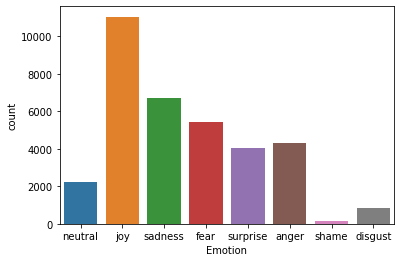

In [20]:
sns.countplot(df['Emotion'])

In [22]:
#Data Cleaning User Handles 
df['Clean_Text']=df['Text'].apply(nfx.remove_userhandles)

In [23]:
#Data Cleaning Stopwords
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_stopwords)

In [26]:
#Features & labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [27]:
#Split Data
x_train,x_test,y_train,y_test =train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [28]:
#building the pipeline 
from sklearn.pipeline import Pipeline 

In [29]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [30]:
#Train and fit the data
pipe_lr.fit(x_train,y_train)

C:\Users\Abhinav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhinav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                             

In [31]:
pipe_lr.score(x_test,y_test)

0.6253113623299482

In [32]:
ex1 = "This book was so interesting it made me happy"

In [33]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [34]:
pipe_lr.predict_proba([ex1])

array([[3.42146545e-03, 2.05460168e-02, 1.37149948e-02, 8.93278692e-01,
        2.32828314e-04, 4.81273516e-02, 3.53501098e-04, 2.03251503e-02]])

In [35]:
#save Model & Pipeline 
import joblib
pipeline_file = open("A:\\Deep_Learning\\E2E NLP\\models\\emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()